导入数据分析工具包，加载数据

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


github_data = pd.read_csv('github_dataset.csv')


观察数据的大致情况

In [2]:
github_data.columns

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

确定有哪些是数值属性，哪些是标称属性

In [3]:
github_data.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


标称属性频率计数

In [4]:
github_data['repositories'].value_counts()

repositories
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: count, Length: 972, dtype: int64

In [5]:
github_data['language'].value_counts()

language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionS

提取数值属性

In [6]:
numeric_github_data = pd.DataFrame(github_data, columns=['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors'])

给出数值属性的5数概括及缺失值的个数

In [7]:
numeric_describe = numeric_github_data.describe()
numeric_describe.loc[['mean', '25%', '50%', '75%', 'max']]

,stars_count,forks_count,issues_count,pull_requests,contributors
mean,81.976236,53.884981,8.656844,4.374525,8.364068
25%,1.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,6.000000,2.000000,0.000000,2.000000
75%,65.250000,38.250000,6.000000,2.000000,4.000000
max,995.000000,973.000000,612.000000,567.000000,658.000000


缺失值统计

In [8]:
NaN_counts = github_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T
NaN_counts

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
NaN_counts,0,0,0,0,0,0,145


可视化语言计数直方图

<BarContainer object of 51 artists>

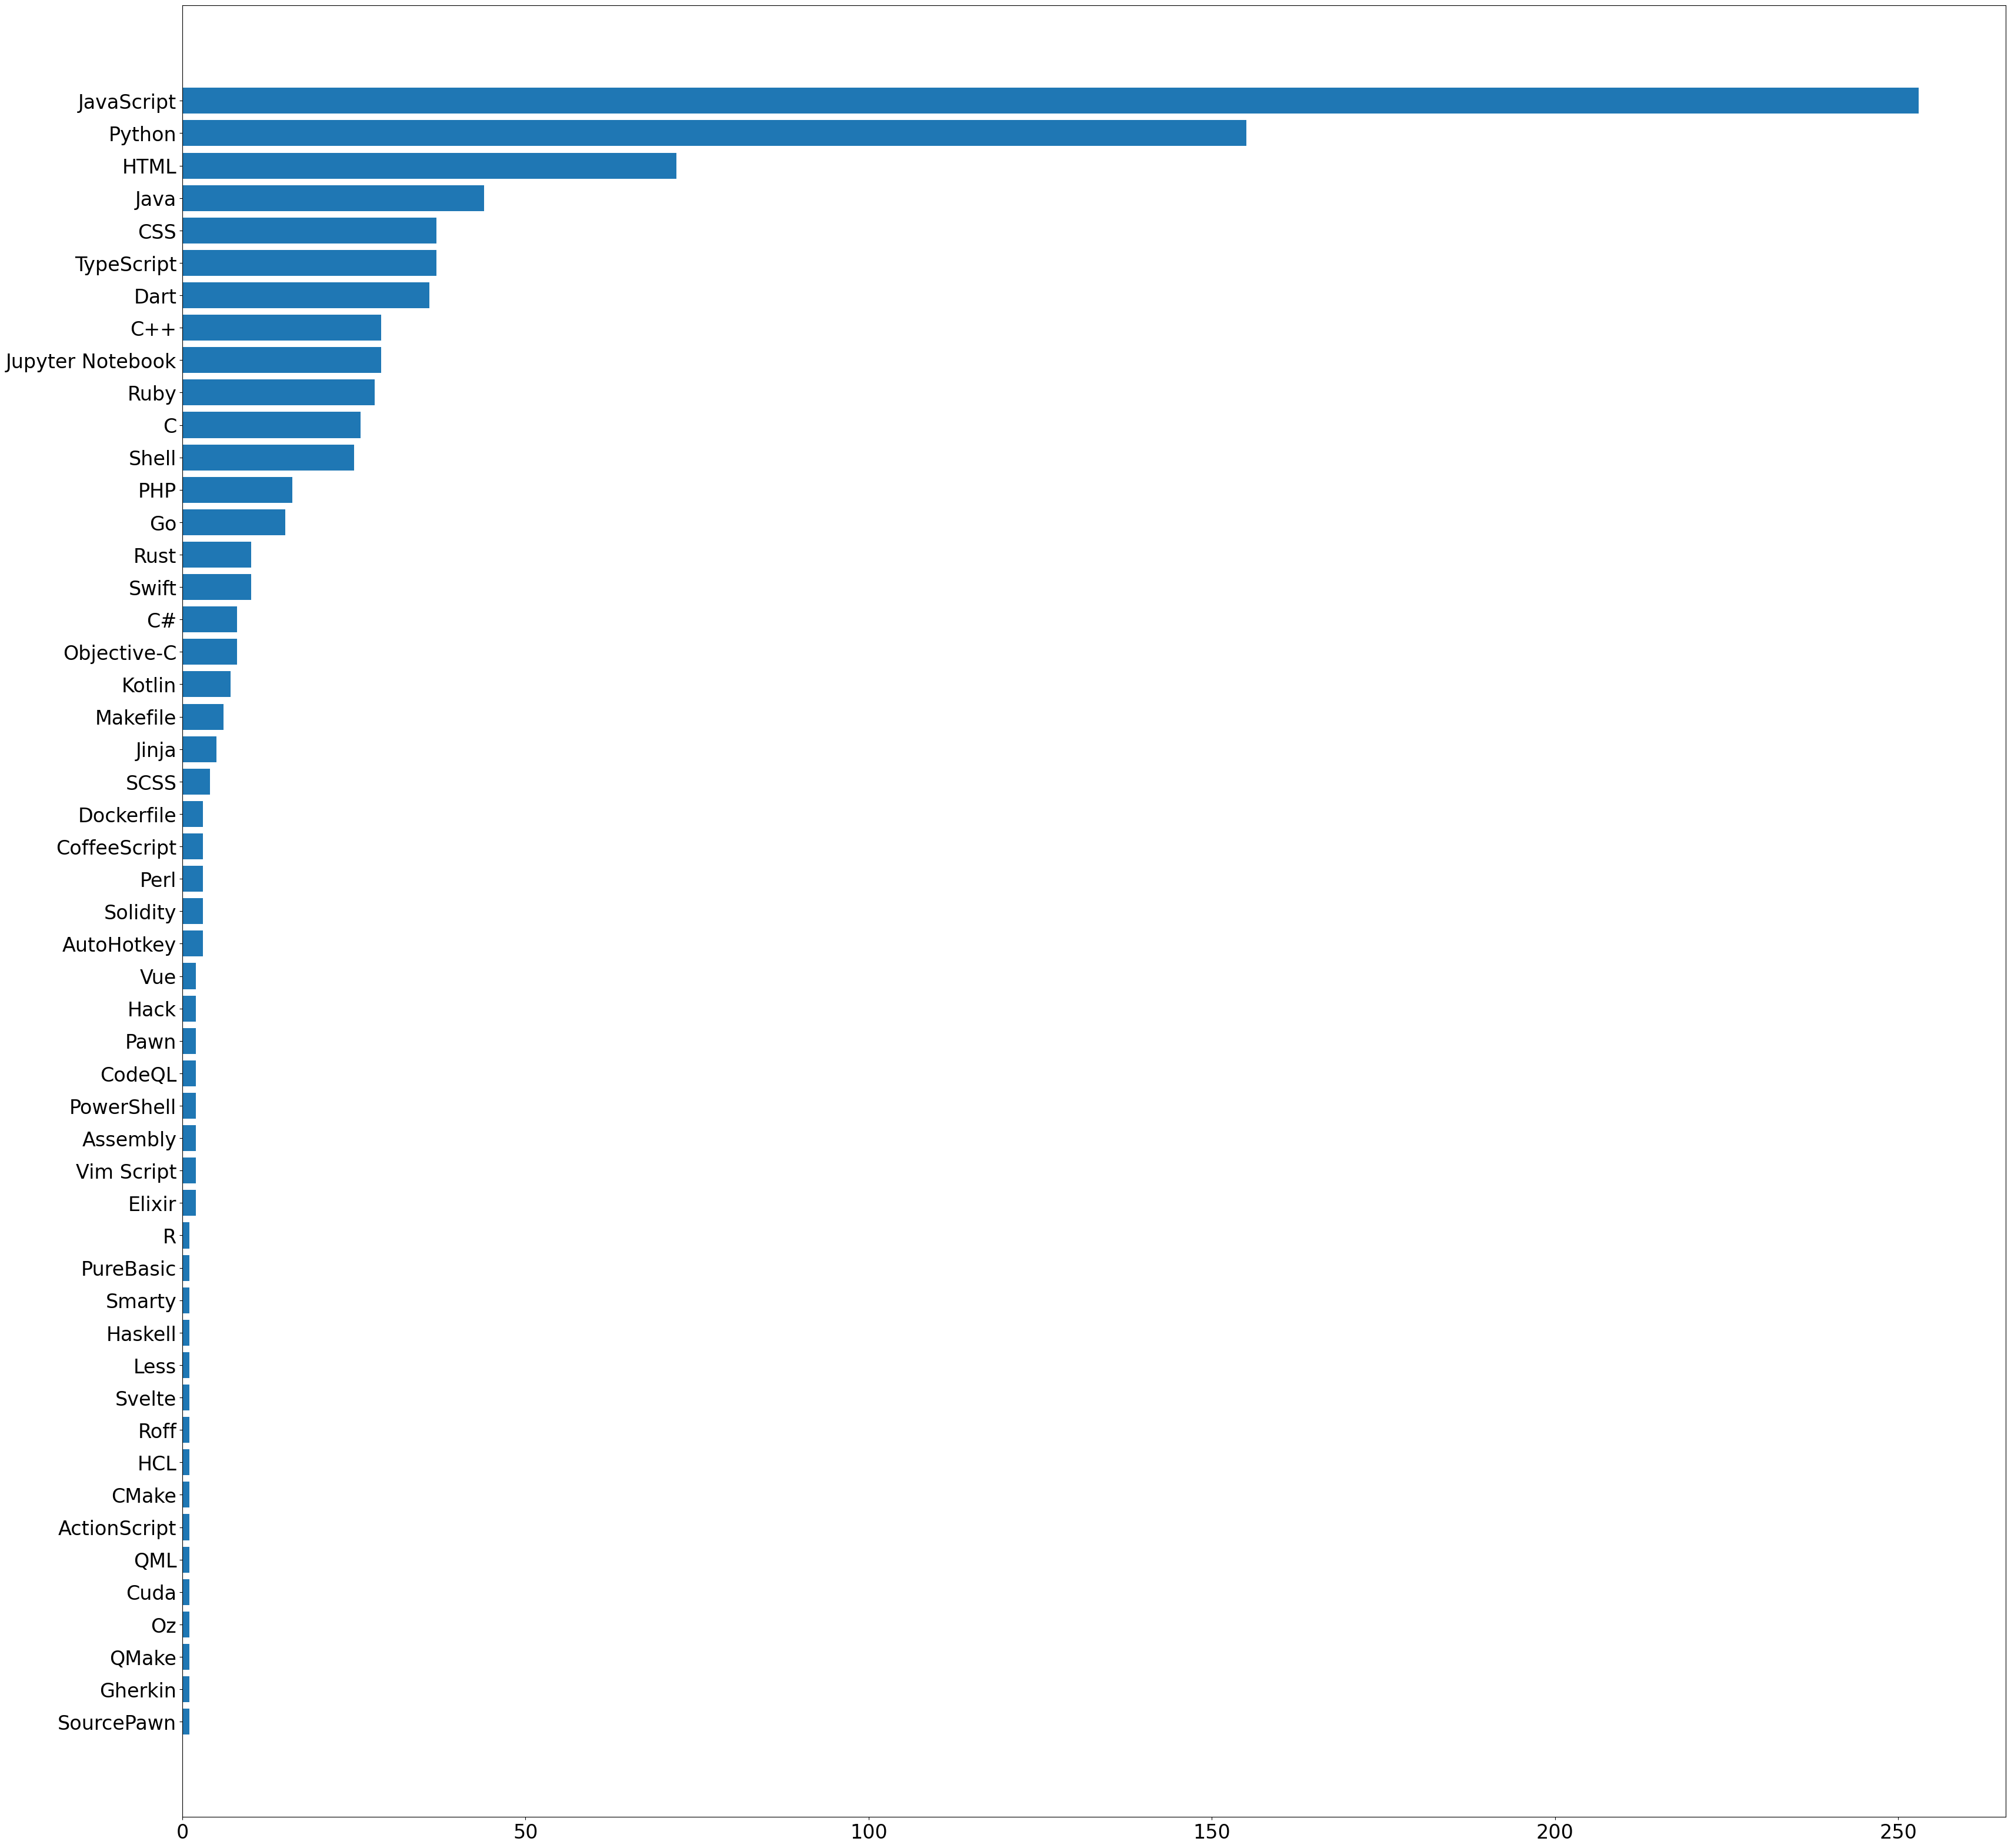

In [9]:
language_counts = pd.DataFrame(github_data['language'].value_counts()).sort_values(by='count', ascending=True)
pd.DataFrame(github_data['language'].value_counts()).T
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=language_counts['count'])

各语言的stars_count箱图

C:\Users\jiangzeshi\AppData\Local\Temp\ipykernel_15872\3863203581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket')


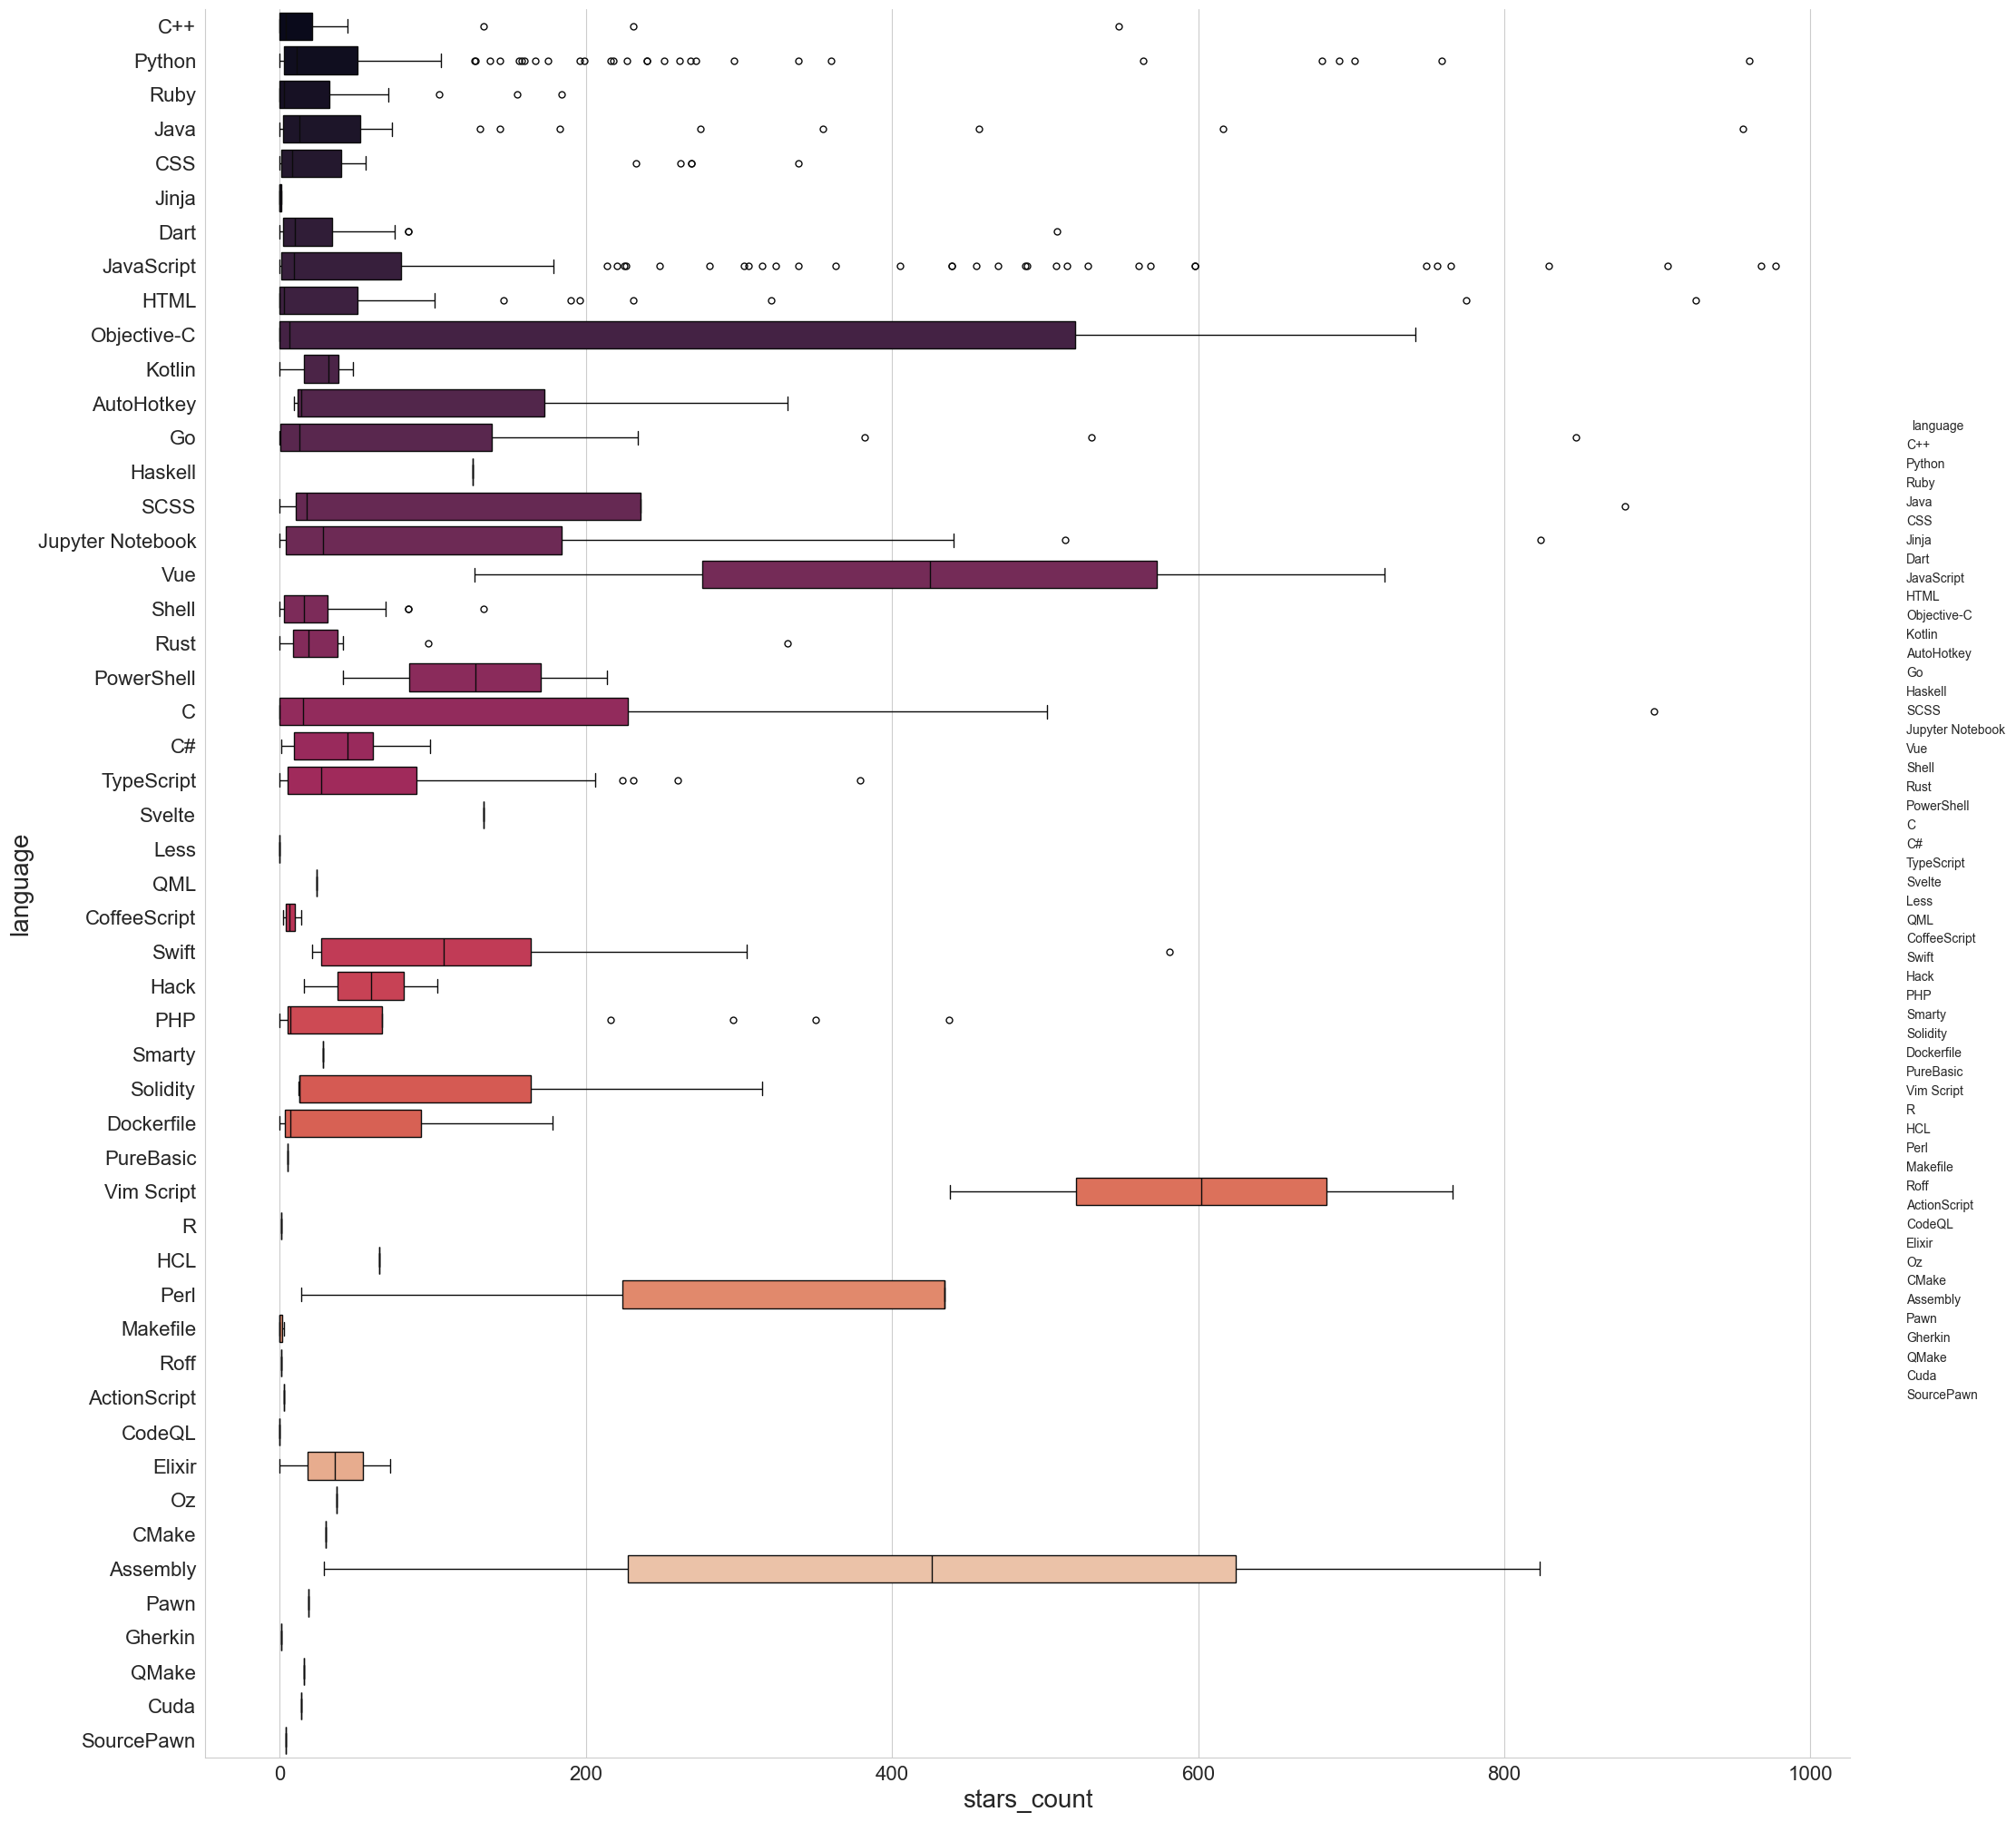

In [10]:
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('stars_count', fontsize=20)
plt.show()

处理异常值，采用最高频的语言替换异常值的方式

In [11]:
github_data_replaced = github_data.replace(np.nan, 'JavaScript')
github_data_replaced

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,JavaScript
1,EddieHubCommunity/support,271,150,536,6,71,JavaScript
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


处理异常值之后的语言计数直方图，javascript的计数量显著提高

<BarContainer object of 51 artists>

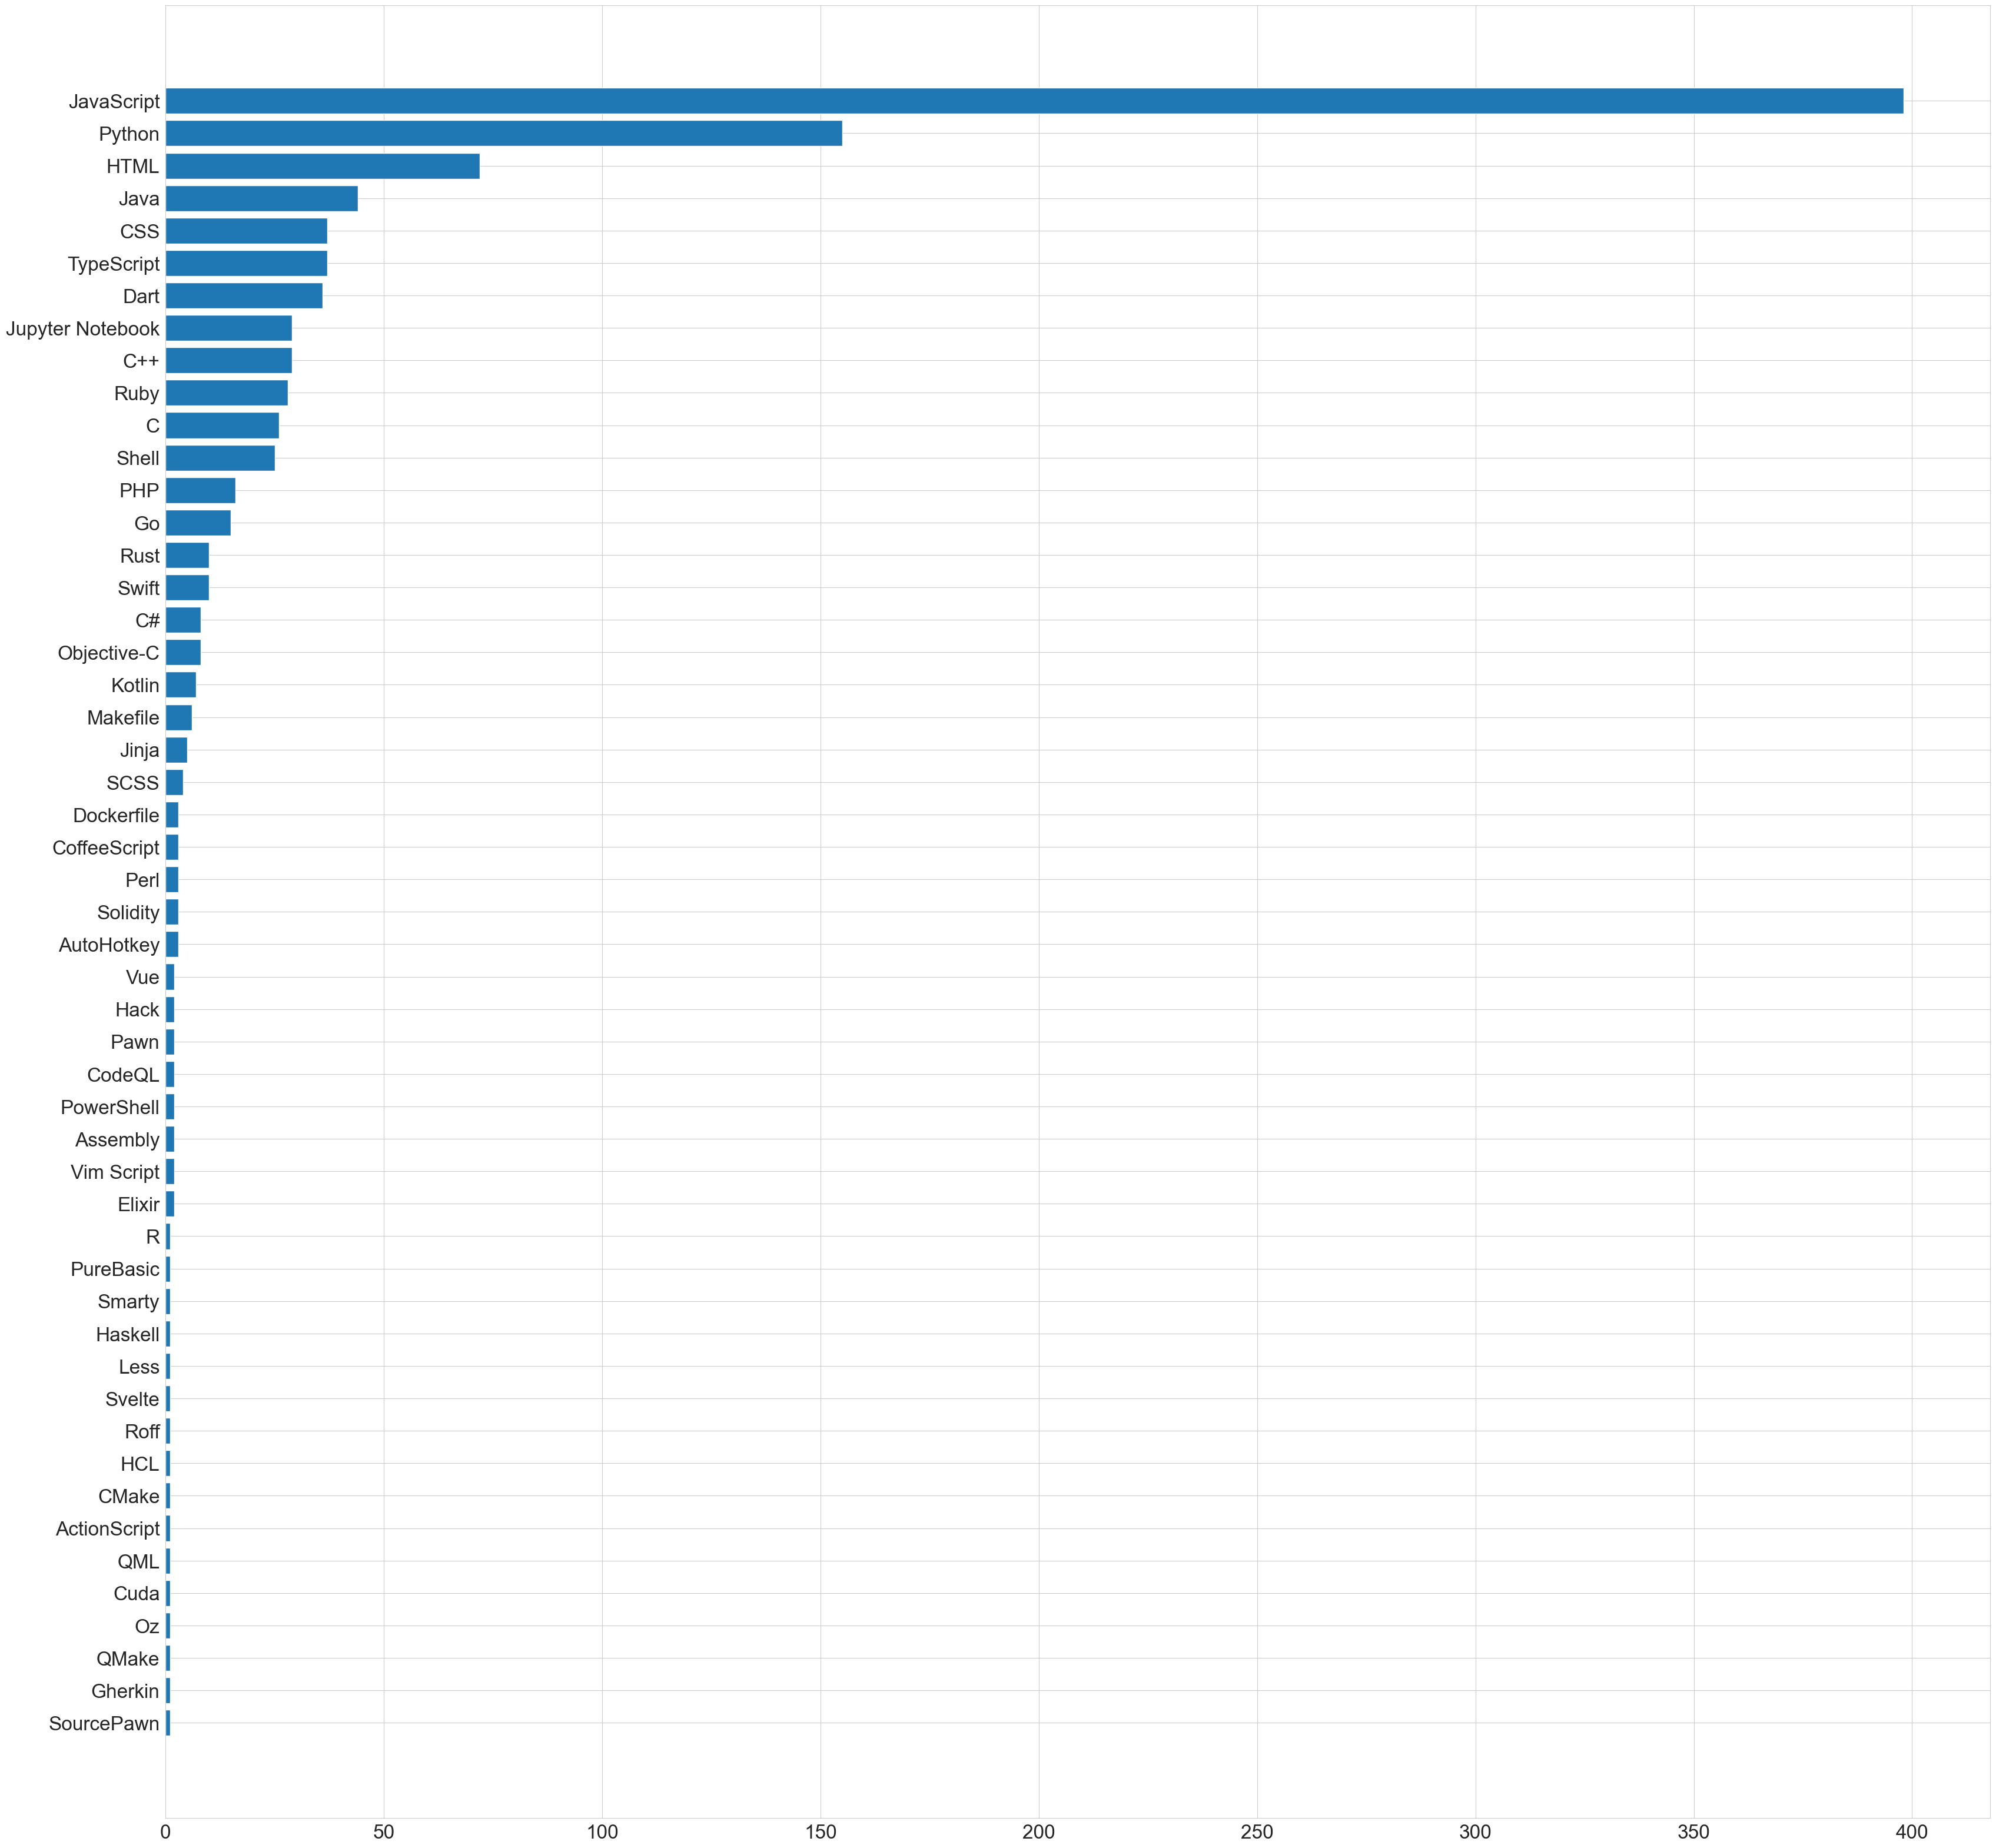

In [12]:
language_counts = pd.DataFrame(github_data_replaced['language'].value_counts()).sort_values(by='count', ascending=True)
pd.DataFrame(github_data_replaced['language'].value_counts()).T
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=language_counts['count'])

处理异常值之后各语言的stars_count箱图，可以观察到JavaScript语言的stars_count分布更加分散。

C:\Users\jiangzeshi\AppData\Local\Temp\ipykernel_15872\3250824859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stars_count_box = sns.catplot(data=github_data_replaced, kind='box', y='language', x='stars_count', height=20, palette='rocket')


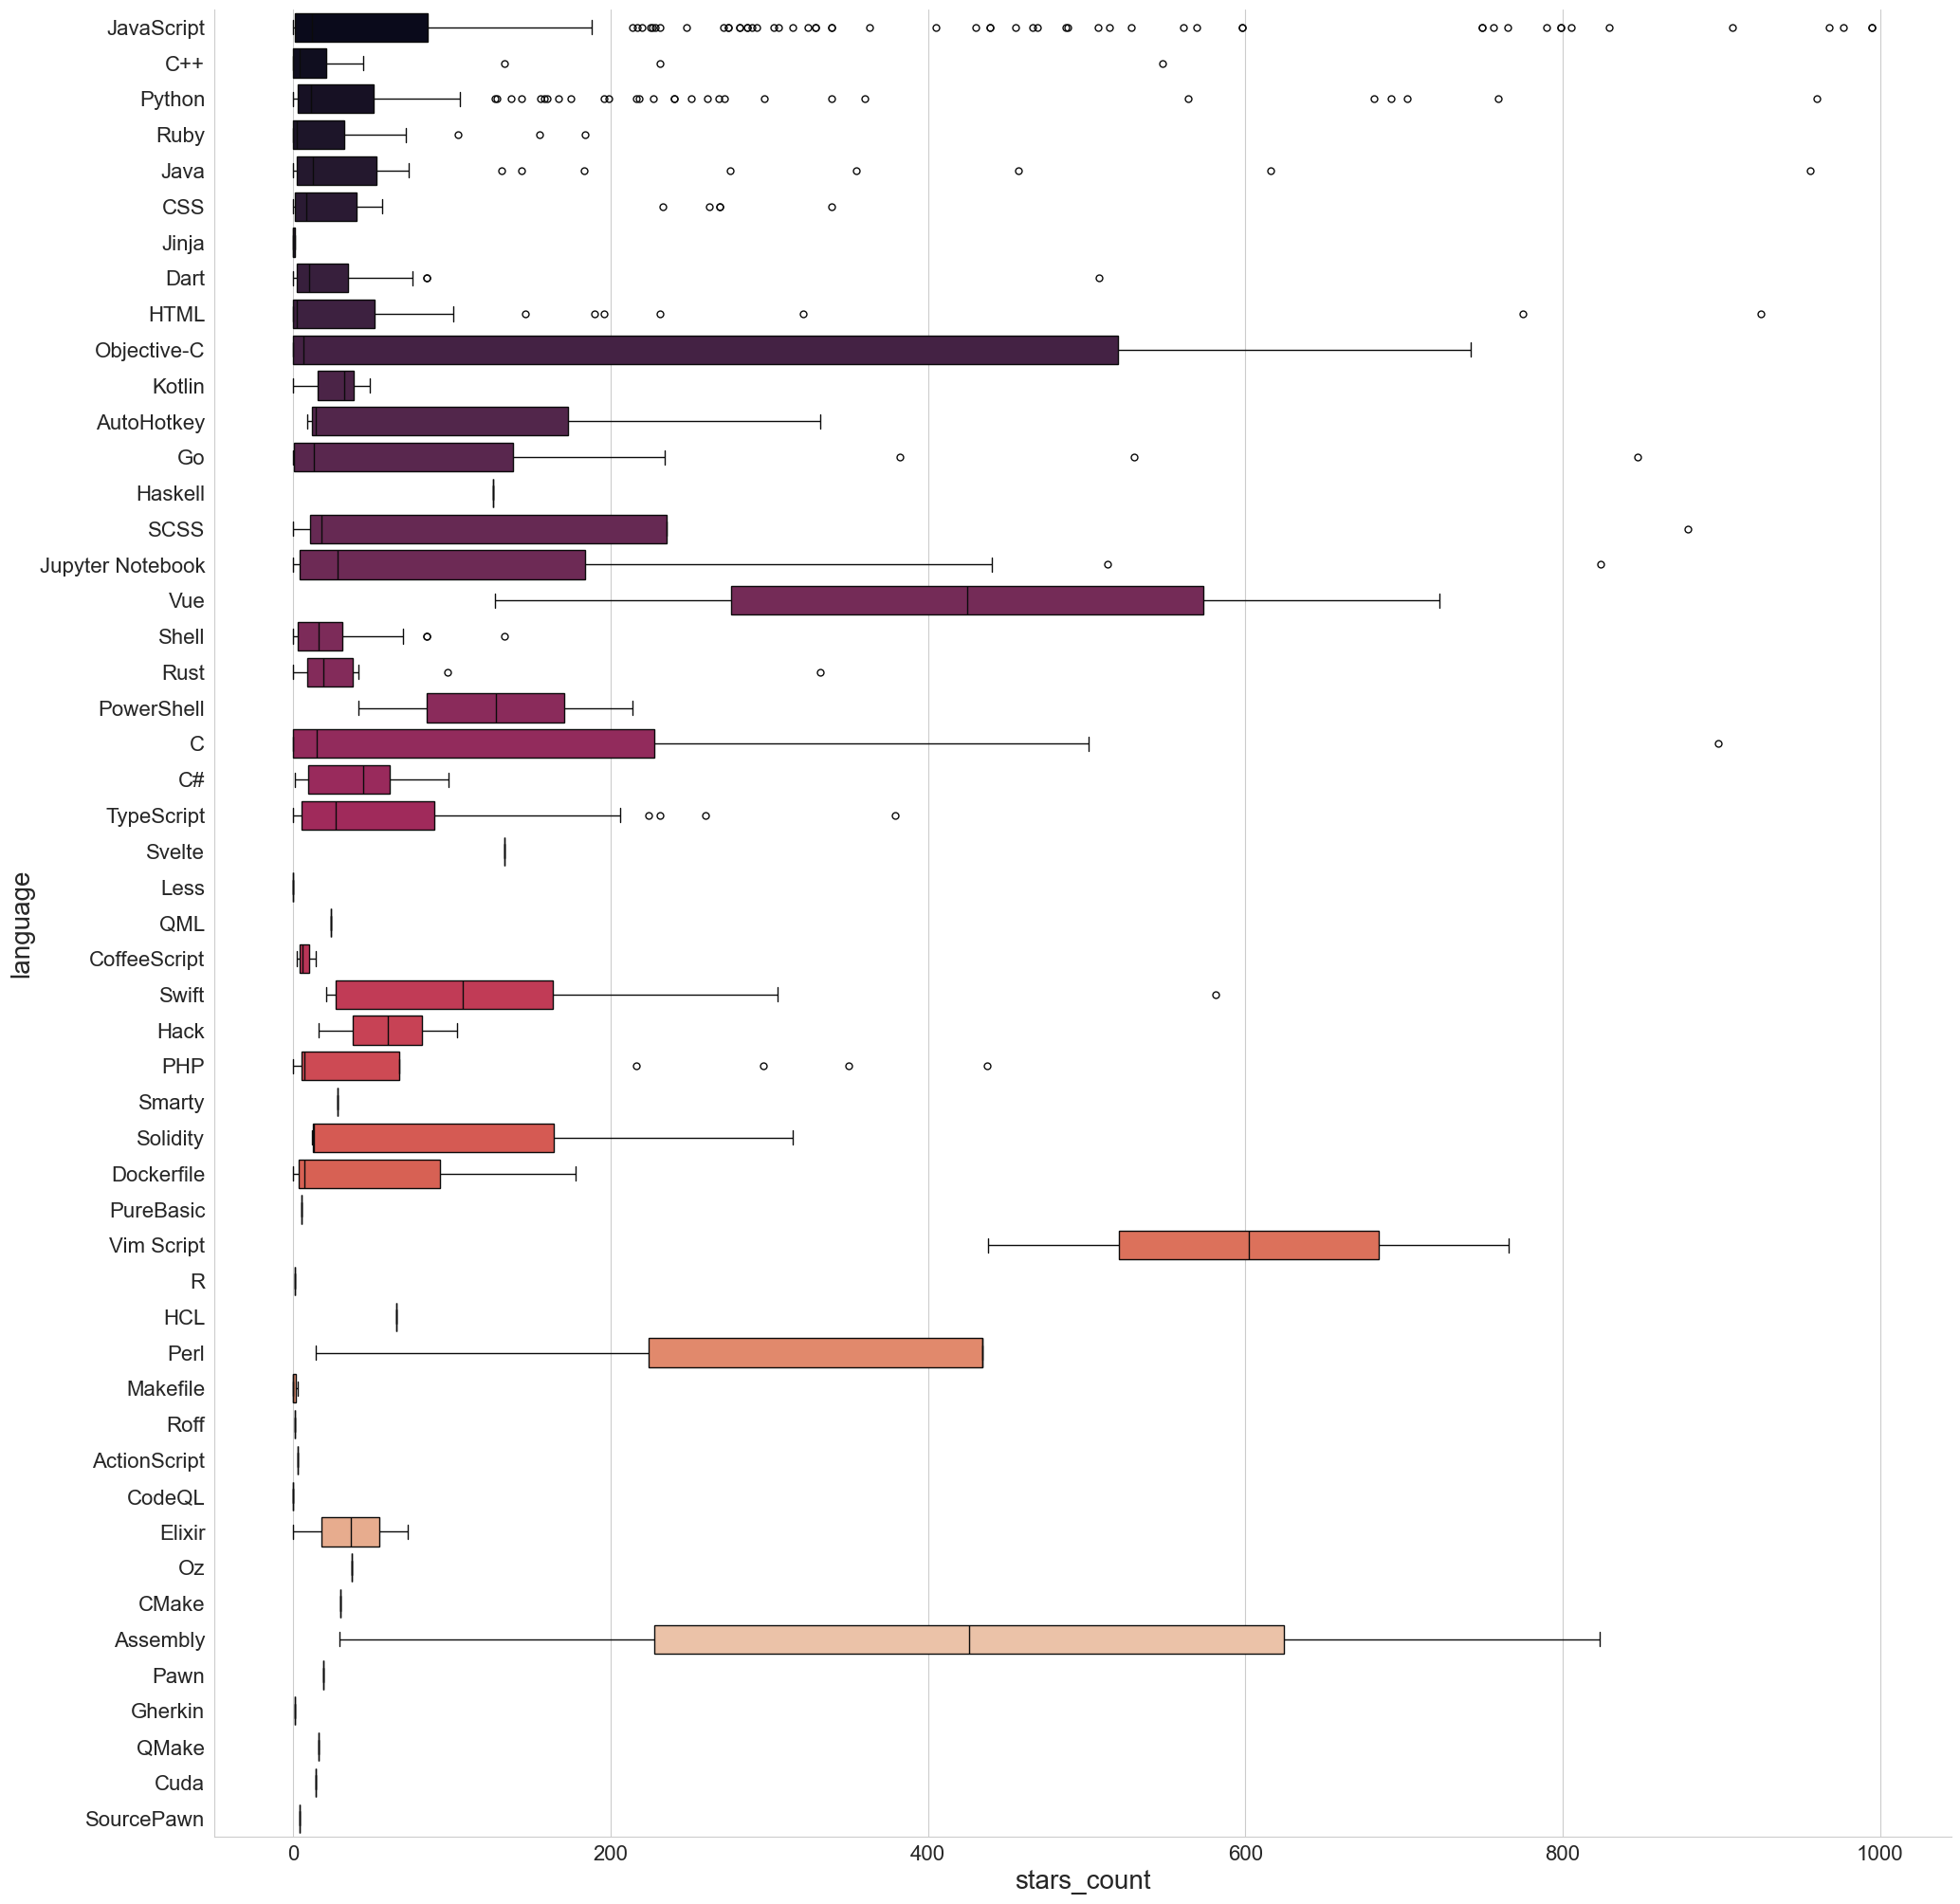

In [13]:
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=github_data_replaced, kind='box', y='language', x='stars_count', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('stars_count', fontsize=20)
plt.show()